In [17]:
import pandas as pd

In [18]:
import numpy as np

In [19]:
import matplotlib.pyplot as plt

In [20]:
#Aggregating the states files into one DF file:

In [21]:
import glob

In [22]:
states_files = glob.glob('C:\\Users\\malna\\Data Base\\My Projects\\Cleaning US Census Data\\US Census Data\\states*.csv')

In [23]:
states_list = [pd.read_csv(filename) for filename in states_files]

In [24]:
states = pd.concat(states_list)

In [25]:
print(states.head())

   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific       Income            GenderPop  
0   0.03%  $43,296.36     2341093M_2489527F  
1   1.06%  $70,354.74       384160M_349215F  
2   0.17%  $54,207.82     3299088M_3342840F  
3   0.15%  $41,935.63     1451913M_1506295F  
4   0.35%  $67,264.78   19087135M_19334329F  


In [26]:
print(states.columns)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')


In [27]:
print(states.dtypes)

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


In [28]:
#Income Column: To Numeric & Round:

In [29]:
states.Income = states.Income.replace('[\$,\s]', '', regex=True)

In [30]:
states.Income = pd.to_numeric(states.Income)

In [31]:
states.Income = np.round(states.Income, 2)

In [32]:
print(states.Income.dtypes)

float64


In [33]:
print(states.Income.head())

0    43296.36
1    70354.74
2    54207.82
3    41935.63
4    67264.78
Name: Income, dtype: float64


In [34]:
#GenderPop Column: Splitting & To Numeric:

In [35]:
states.GenderPop = states.GenderPop.str.split('_')

In [36]:
print(states.GenderPop.head())

0      [2341093M, 2489527F]
1        [384160M, 349215F]
2      [3299088M, 3342840F]
3      [1451913M, 1506295F]
4    [19087135M, 19334329F]
Name: GenderPop, dtype: object


In [37]:
states['Male'] = states.GenderPop.str.get(0).replace('[M,\s]', '', regex=True)

In [38]:
states['Female'] = states.GenderPop.str.get(1).replace('[F,\s]', '', regex=True)

In [39]:
states.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,Female
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,"[2341093M, 2489527F]",2341093,2489527
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,"[384160M, 349215F]",384160,349215
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,"[3299088M, 3342840F]",3299088,3342840
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,"[1451913M, 1506295F]",1451913,1506295
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,"[19087135M, 19334329F]",19087135,19334329


In [40]:
states.Male = pd.to_numeric(states.Male)

In [41]:
states.Female = pd.to_numeric(states.Female)

In [42]:
print(states[['Male', 'Female']].dtypes)

Male        int64
Female    float64
dtype: object


In [43]:
#Scatterplot between Female & Income:

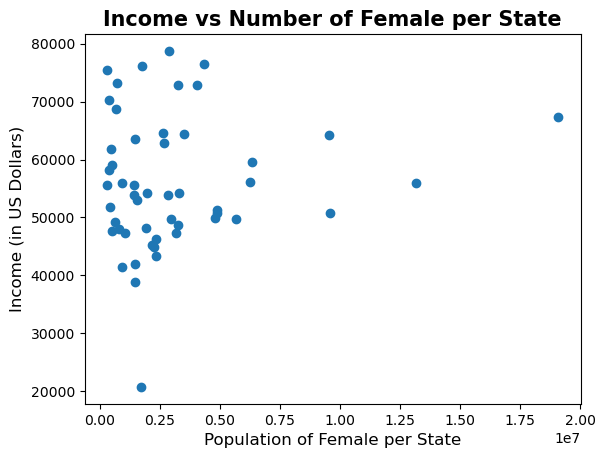

<Figure size 640x480 with 0 Axes>

In [64]:
plt.scatter(x= states.Male, y= states.Income)
plt.title('Income vs Number of Female per State', fontsize= 15, fontweight= 'bold')
plt.xlabel('Population of Female per State', fontsize= 12)
plt.ylabel('Income (in US Dollars)', fontsize= 12)
plt.savefig(r'C:\Users\malna\Data Base\My Projects\Cleaning US Census Data\Results\Income vs Number of Female per state.png')
plt.show()
plt.clf()

In [45]:
#

In [46]:
print(states.Female)

0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
5     2630239.0
0     2630239.0
1     1841615.0
2      478041.0
3      340810.0
4    10045763.0
5     5123362.0
0     5123362.0
1      696428.0
2      806083.0
3     6556862.0
4     3333382.0
5     1558931.0
0     1558931.0
1     1453125.0
2     2233145.0
3     2364097.0
4      679019.0
5           NaN
0           NaN
1     3455936.0
2     5038598.0
3     2727005.0
4     1536358.0
5     3081445.0
0     3081445.0
1           NaN
2      939759.0
3     1390901.0
4      670717.0
5     4561386.0
0     4561386.0
1     1051703.0
2    10131373.0
3     5049925.0
4      353677.0
5     5913084.0
0     5913084.0
1     1942789.0
2     1990780.0
3     6534215.0
4     1869213.0
5      543273.0
0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
5     1444150.0
0     1444150.0
1      318031.0
2     4195682.0
3     3497739.0
4      937789.0
5     2890732.0
Name: Female, dtype: float64


In [47]:
states.Female= states.Female.fillna(states.TotalPop - states.Male)

In [48]:
print(states.Female)

0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
5     2630239.0
0     2630239.0
1     1841615.0
2      478041.0
3      340810.0
4    10045763.0
5     5123362.0
0     5123362.0
1      696428.0
2      806083.0
3     6556862.0
4     3333382.0
5     1558931.0
0     1558931.0
1     1453125.0
2     2233145.0
3     2364097.0
4      679019.0
5     3057895.0
0     3057895.0
1     3455936.0
2     5038598.0
3     2727005.0
4     1536358.0
5     3081445.0
0     3081445.0
1      504536.0
2      939759.0
3     1390901.0
4      670717.0
5     4561386.0
0     4561386.0
1     1051703.0
2    10131373.0
3     5049925.0
4      353677.0
5     5913084.0
0     5913084.0
1     1942789.0
2     1990780.0
3     6534215.0
4     1869213.0
5      543273.0
0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
5     1444150.0
0     1444150.0
1      318031.0
2     4195682.0
3     3497739.0
4      937789.0
5     2890732.0
Name: Female, dtype: float64


In [49]:
#Checking and Dropping Duplicates:

In [50]:
states = states.drop('GenderPop', axis=1)

In [51]:
duplicates = states.duplicated(subset= states.columns[1:])

In [52]:
print(duplicates.value_counts())

False    51
True      9
Name: count, dtype: int64


In [53]:
states = states.drop_duplicates(subset= states.columns[1:])

In [54]:
print(states.duplicated(subset= states.columns[1:]).value_counts())

False    51
Name: count, dtype: int64


In [55]:
##Scatterplot between Female & Income AFTER Filling Missing Values:

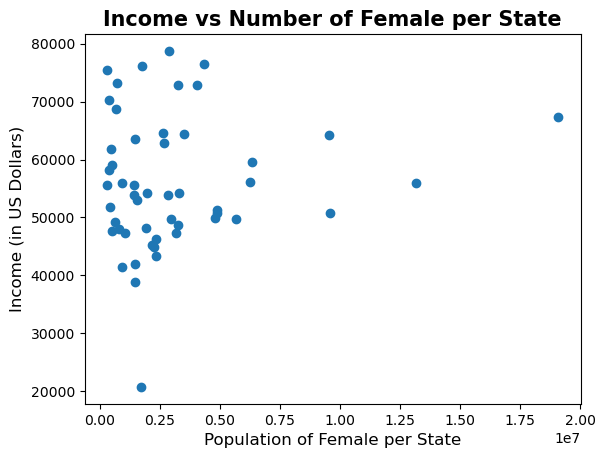

<Figure size 640x480 with 0 Axes>

In [66]:
plt.scatter(x= states.Male, y= states.Income)
plt.title('Income vs Number of Female per State', fontsize= 15, fontweight= 'bold')
plt.xlabel('Population of Female per State', fontsize= 12)
plt.ylabel('Income (in US Dollars)', fontsize= 12)
plt.savefig(r'C:\Users\malna\Data Base\My Projects\Cleaning US Census Data\Results\Income vs Number of Female per state after filling NaN and remocing duplicates.png')
plt.show()
plt.clf()

In [57]:
##Races: To Numeric, Filling & Rounding:

In [58]:
races = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

In [59]:
for race in races:
  states[race] = states[race].replace('[%,\s]', '', regex=True)
  states[race] = pd.to_numeric(states[race])
  states[race] = np.round(states[race], 2)
  states[race] = states[race].fillna(states[race].mean())

In [60]:
print(states.head())

   Unnamed: 0       State  TotalPop  Hispanic  White  Black  Native  Asian  \
0           0     Alabama   4830620      3.75  61.88  31.25    0.45   1.05   
1           1      Alaska    733375      5.91  60.91   2.85   16.39   5.45   
2           2     Arizona   6641928     29.57  57.12   3.85    4.36   2.88   
3           3    Arkansas   2958208      6.22  71.14  18.97    0.52   1.14   
4           4  California  38421464     37.29  40.22   5.68    0.41  13.05   

   Pacific    Income      Male      Female  
0     0.03  43296.36   2341093   2489527.0  
1     1.06  70354.74    384160    349215.0  
2     0.17  54207.82   3299088   3342840.0  
3     0.15  41935.63   1451913   1506295.0  
4     0.35  67264.78  19087135  19334329.0  


In [61]:
print(states.dtypes)

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific       float64
Income        float64
Male            int64
Female        float64
dtype: object


In [62]:
#Histograms of Races:

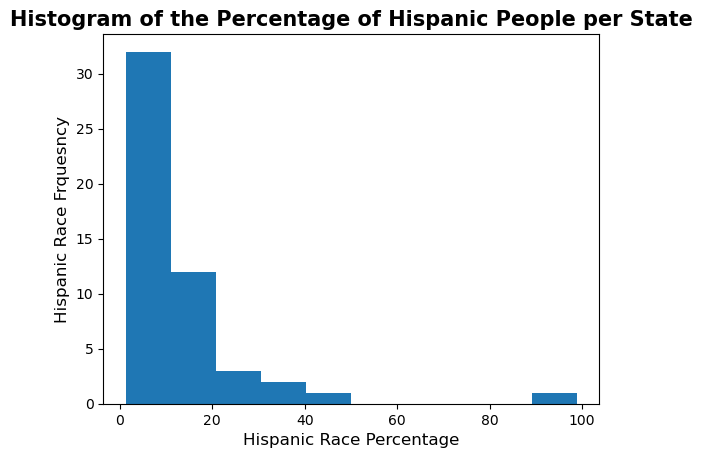

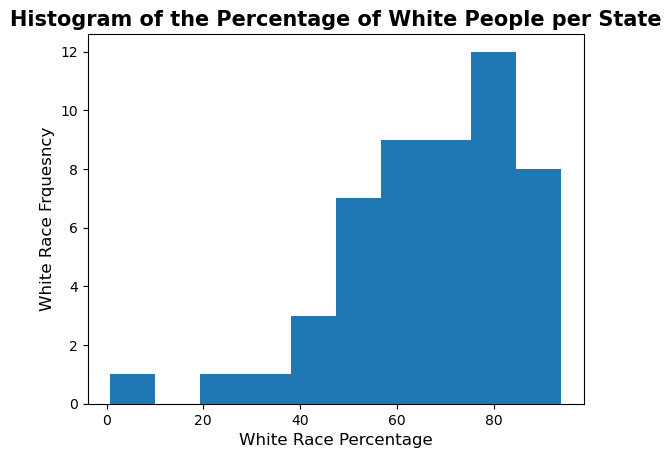

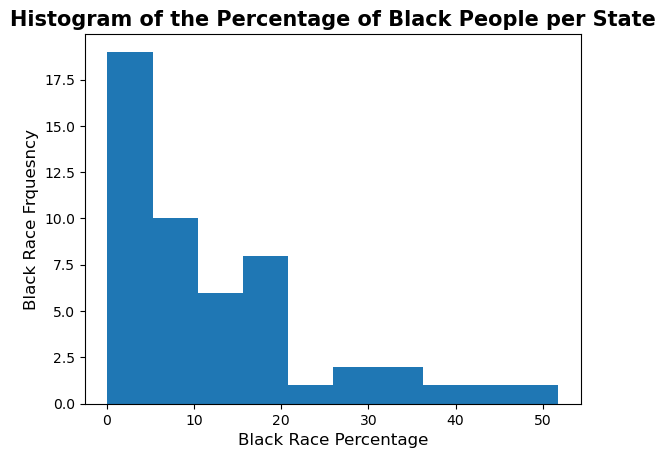

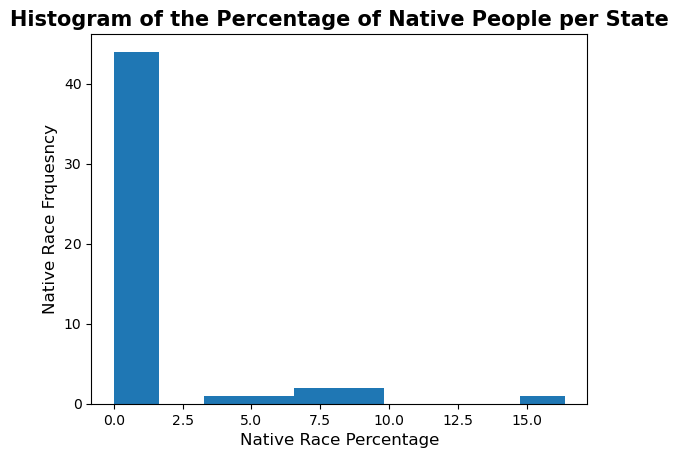

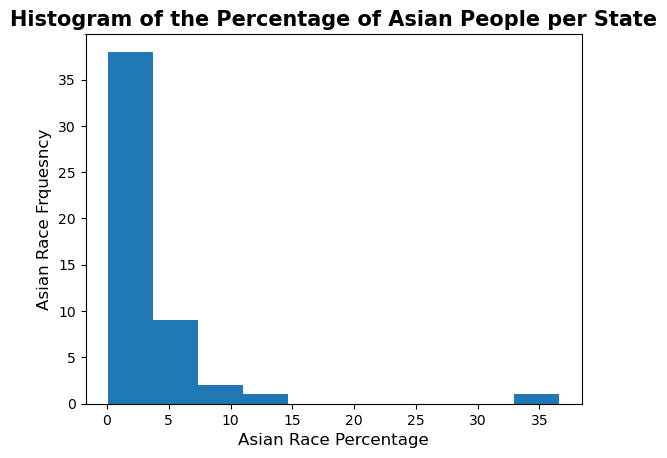

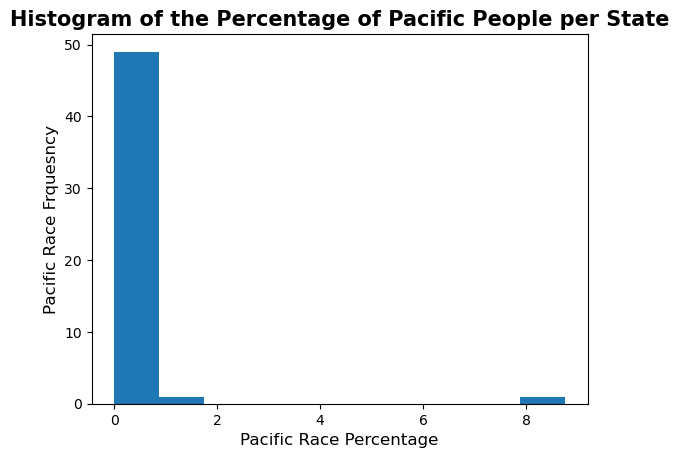

<Figure size 640x480 with 0 Axes>

In [67]:
for race in races:
  plt.hist(states[race], bins=10)
  plt.title('Histogram of the Percentage of {} People per State'.format(race), fontsize= 15, fontweight= 'bold')
  plt.xlabel('{} Race Percentage'.format(race),  fontsize= 12)
  plt.ylabel('{} Race Frquesncy'.format(race),  fontsize= 12)
  plt.savefig(r'C:\Users\malna\Data Base\My Projects\Cleaning US Census Data\Results\Histogram of the Percentage of {} People per State'.format(race))
  plt.show()
  plt.clf()